(scipy)=
# Numerische Programmbibliotheken am Beispiel von NumPy/SciPy

In den bisherigen Kapiteln hatten wir immer wieder Gelegenheit, auf
Möglichkeiten hinzuweisen, die die Python-Standardbibliothek bietet. Wenn man
die dort zur Verfügung gestellten Module verwendet, kann man sich Einiges an
Arbeit sparen und dabei auch den Code effizienter und übersichtlicher
gestalten.  Neben der Python-Standardbibliothek gibt es aber auch noch viele
interessante Programmpakete, die häufig über den [Python Package
Index](https://pypi.org/) zur Verfügung gestellt werden.

Gerade für Problemstellungen in den Natur- und Ingenieurwissenschaften gibt es
eine oft als *scientific ecosystem of Python* oder *scientific stack*
bezeichnete Sammlung von zentralen Paketen. Hierzu gehört als Basispaket
zunächst [NumPy](http://numpy.org/), das den Datentyp `ndarray` sowie Methoden
zur Verfügung stellt, um mit `ndarray`-Objekten zu arbeiten. Damit wird das
Rechnen mit Vektoren und Matrizen ermöglicht, das wir bei der Besprechung von
Listen in {numref}`listen` vermisst hatten.

Ein weiteres wichtiges Paket ist [SciPy](https://docs.scipy.org/doc/scipy/reference/), das vielfältige numerische Werkzeuge zur Verfügung stellt, beispielsweise
zur numerischen Integration oder der Lösung von Differentialgleichungssystemen,
zur Lösung von Optimierungsproblemen oder zur Berechnung von speziellen 
Funktion sowie vielem Anderem mehr. In diesem Kapitel werden wir einen
ersten Eindruck von den Möglichkeiten geben, die NumPy und SciPy bereitstellen.

Weitere zentrale Pakete, die in diesem Zusammenhang zu nennen sind, wären
[Matplotlib](http://matplotlib.org/) zur graphischen Darstellung von Daten,
[IPython](http://ipython.org/), eine interaktive Python-Konsole, die für das
[Projekt Jupyter](https://jupyter.org/), das unter anderem die Jupyter
Notebooks zur Verfügung stellt, von zentraler Bedeutung war und ist,
[SymPy](http://sympy.org/) für das symbolische Rechnen sowie das im
{numref}`readfile` bereits erwähnte [pandas](http://pandas.pydata.org/),
das fortgeschrittene Datenstrukturen und vielfältige Methoden zu einer
effizienten Datenanalyse bereithält.

Auf der Basis dieser Pakete haben einzelne wissenschaftliche Disziplinen
umfangreiche, auf ihre speziellen Bedürfnisse zugeschnittene Programmpakete
entwickelt. So kann [Astropy](https://www.astropy.org/) als Standard in der
Astronomie angesehen werden. [QuTiP](http://qutip.org/), die *Quantum Toolbox
in Python* erlaubt die Simulation von Quantensystemen. Für Problemstellungen,
die sich mit finite-Elemente-Methoden lösen lassen, steht
[FEniCS](https://fenicsproject.org/) zur Verfügung. Diese Aufzählung könnte
fast beliebig fortgesetzt werden und soll nur dazu dienen, einen allerersten
Eindruck von der Vielfalt der zur Verfügung stehenden
Python-Programmbibliotheken zu geben.

````{margin}
```{seealso} 
Quellen für hier besprochene Programmpakete:
[NumPy auf Github](https://github.com/numpy/numpy),
[SciPy auf Github](https://github.com/scipy/scipy)
```
````

Nachdem die Benutzung professioneller Programmpakete gelegentlich mit hohen
Kosten verbunden sein kann, ist es erwähnenswert, dass die hier aufgeführten
Pakete frei verfügbar, aber dennoch von sehr hoher Qualität sind. Zwei Beispiele
prominenter Forschungsprojekte, deren Arbeit wesentlich auf einigen der hier
genannten Pakete, sind in {numref}`warumpython` genannt. Darüber hinaus ist
der Quellcode der Pakete verfügbar, so dass man sich bei Bedarf auch die
konkrete Implementierung ansehen sowie zur Weiterentwicklung beitragen kann.

## Installation

Da NumPy und SciPy nicht in der Python-Standardbibliothek enthalten sind, stehen
diese Programmpakete auch bei einer vorhandenen Python-Installation nicht
automatisch zur Verfügung. Dies lässt sich leicht überprüfen, indem man versucht,
die beiden Pakete zu importieren. Schlägt dies fehl, so erhält man einen
`ImportError`, der impliziert, dass Python die Pakete nicht finden kann.
Außerdem lässt sich die installierte Version anzeigen, was deswegen interessant
sein kann, weil gelegentlich neue Funktionalität zu den Paketen hinzugefügt
wird. Beachten Sie, dass vor und nach `version` jeweils zwei Unterstriche
stehen müssen.

In [1]:
import numpy
import scipy

print(f'{numpy.__version__ = }')
print(f'{scipy.__version__ = }')

numpy.__version__ = '2.3.3'
scipy.__version__ = '1.16.2'


Eine einfache und empfehlenswerte Möglichkeit, NumPy und SciPy unter Windows,
MacOS oder Linuxvarianten wie Ubuntu verfügbar zu machen, besteht darin, die
[Anaconda-Distribution](https://www.anaconda.com/products/individual) zu
installieren. Dabei werden allerdings gleichzeitig zahlreiche andere, für
wissenschaftliche Zwecke interessante Programmpakete installiert.  Ist dies
nicht erwünscht, zum Beispiel wegen des relativ großen Bedarfs an
Speicherplatz, kann man NumPy und SciPy auch gezielt auf einem der Wege
installieren, die in der [Installationsanleitung für
NumPy](https://numpy.org/install/) und der [Installationsanleitung für
SciPy](https://www.scipy.org/install.html) beschrieben sind.

## Arrays und Anwendungen

Für die Arbeit mit dem NumPy-Paket ist es üblich, für `numpy` die Abkürzung
`np` einzuführen.

In [2]:
import numpy as np

Dies bedeutet, dass man bei der Verwendung von NumPy vor die entsprechenden
Funktionen jeweils `np.` setzen muss. Diese Abkürzung verringert den Tippaufwand
und macht zum anderen sofort erkenntlich, wenn es sich um eine Funktion aus dem
NumPy-Paket handelt. Dies ist unter anderem deswegen wichtig, weil NumPy unter
anderem auch Funktionen wie die Exponentialfunktion {func}`exp` zur Verfügung
stellt, die von der Exponentialfunktion aus dem `math`-Modul unterschieden werden
muss.

Das zentrale Objekt, das durch das NumPy-Paket zur Verfügung gestellt wird, ist
das `ndarray`, wobei die Abkürzung für N-dimensionales Array steht. Hiermit lassen
sich also Vektoren und Matrizen von im Prinzip beliebiger Dimension darstellen,
wobei alle Einträge vom gleichen Datentyp sind.

Es gibt eine ganze Reihe von Möglichkeiten, solche Arrays zu konstruieren. Wir
beginnen damit eine Matrix aus einer Liste oder im Allgemeinen Listen von Listen
zu erzeugen.

In [3]:
matrixA = np.array([[1.3, 2.5], [-1.7, 3.9]])
print(type(matrixA))
print(matrixA)

<class 'numpy.ndarray'>
[[ 1.3  2.5]
 [-1.7  3.9]]


Für `ndarray`s ist eine Matrixmultiplikation definiert. Um dies zu demonstrieren,
definieren wir ein zweites Array und führen die Matrixmultiplikation aus. Dafür
können wir die Funktion `np.dot` verwenden oder den `@`-Operator, der in moderneren
Versionen des NumPy-Pakets definiert ist. Anschließend überprüfen wir das Ergebnis
am 00-Element.

In [4]:
matrixB = np.array([[2.1, -4.5], [0.9, -2.1]])
print(matrixA)
print()
print(matrixB)
print()
print(matrixA @ matrixB)
print()
print(f'{matrixA[0, 0]}*{matrixB[0, 0]} + {matrixA[0, 1]}*{matrixB[1, 0]} = '
      f'{matrixA[0, 0]*matrixB[0, 0] + matrixA[0, 1]*matrixB[1, 0]}')

[[ 1.3  2.5]
 [-1.7  3.9]]

[[ 2.1 -4.5]
 [ 0.9 -2.1]]

[[  4.98 -11.1 ]
 [ -0.06  -0.54]]

1.3*2.1 + 2.5*0.9 = 4.98


Dabei zeigen die letzten beiden Zeilen, wie man Elemente des Arrays adressieren
kann, nämlich indem die Indizes für die einzelnen Dimensionen durch Komma getrennt
in eckigen Klammern angegeben werden.

```{admonition} Multiplikationsoperatoren @ und *
:class: warning
Beachten Sie, dass der normale Multiplikationsoperator `*` die beiden Matrizen
elementweise multipliziert und somit keine Matrixmultiplikation ausführt, wie
es `@` verlangt. Probieren Sie es an einem Beispiel selbst aus!
```

Wie bei Listen kann die Adressierung auch mit Hilfe von Slices erfolgen, so dass
man bequem Untermatrizen extrahieren kann. Wichtig dabei ist, dass hier kein neues
Array erzeugt wird, sondern nur eine andere Sicht auf das bereits existierende Array
bereitgestellt wird. Dadurch ist ein solcher Zugriff sehr effizient. In diesem
Beispiel verwenden wird zur schnellen Erzeugung eines etwas größeren Arrays die
{func}`arange`-Funktion, die mit mit {func}`range` vergleichbar ist, aber eben ein
zunächst eindimensionales Array erzeugt. Dieses können wir dann mit der
{func}`reshape`-Methode beispielsweise in ein zweidimensionales Array umwandeln.

In [5]:
matrixC = np.arange(36).reshape(6, 6)
print(matrixC)
print()
print(matrixC[1:3, 3:5])

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]

[[ 9 10]
 [15 16]]


In der letzten Zeile extrahieren wir eine Untermatrix. Dabei bezieht sich das erste
Slice auf die Zeilen und das zweite Slice auf die Spalten. So können wir auch eine
Zerlegung in Blockmatrizen vornehmen.

In [6]:
print(matrixC[:3, :3])
print()
print(matrixC[:3, 3:])
print()
print(matrixC[3:, :3])
print()
print(matrixC[3:, 3:])

[[ 0  1  2]
 [ 6  7  8]
 [12 13 14]]

[[ 3  4  5]
 [ 9 10 11]
 [15 16 17]]

[[18 19 20]
 [24 25 26]
 [30 31 32]]

[[21 22 23]
 [27 28 29]
 [33 34 35]]


Zudem kann die Möglichkeit eines Slices, die Schrittweite anzugeben, verwenden.

In [7]:
print(matrixC[::2, ::3])

[[ 0  3]
 [12 15]
 [24 27]]


Während wir bei Listen gewohnt sind, diese mit der {func}`append`-Methode um weitere
Elemente zu erweitern, sollte man ein solches Vorgehen bei Arrays vermeiden. Da dabei
jeweils ein neues Array erzeugt wird, wäre ein solches Vorgehen äußerst ineffizient.
Stattdessen legt man das Array zunächst in der benötigten Größe an, zum Beispiel mit
Hilfe von {func}`np.zeros` oder {func}`np.ones`. Das folgende Beispiel illustriert,
wie man die Dimension des Arrays sowie den Datentyp festlegen kann und was die
Multiplikation des Arrays mit einer Zahl bedeutet.

In [8]:
5*np.ones(shape=(2, 3, 4), dtype=np.int64)

array([[[5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5]],

       [[5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5]]])

```{admonition} Integer-Arrays
:class: warning
Bei Python sind wir gewohnt, dass Integer im Prinzip beliebig groß werden können.
Bei `ndarray`s mit Datentyp Integer ist dies nicht der Fall. Der mögliche
Zahlenbereich ist je nach dem gewählten Integertyp eingeschränkt. Genaueres hierzu
findet man in der [NumPy-Dokumentation zu Datentypen](https://numpy.org/doc/stable/user/basics.types.html).
```

Statt NumPy-Arrays im Detail zu diskutieren, wollen wir im Folgenden einen Eindruck von
einigen Möglichkeiten geben, die dieser Datentyp bietet. Für die Arbeit mit `ndarray`s
sollten man sich aber auf jeden Fall genauer mit diesen vertraut machen. Wir verweisen
hierzu zum Beispiel auf die [NumPy-Dokumentation](https://numpy.org/doc/stable/), aber auch
auf [Teil 1](https://youtu.be/R2rCYf3pv-M) und [Teil 2](https://youtu.be/sunNXIxIGV8) eines
Videotutorials.

Zu Beginn des Kapitels hatten wir gesehen, wie man Matrizen miteinander multiplizieren kann.
Für Vektoren erhält man auf diese Weise unmittelbar das Skalarprodukt. Darüber hinaus kann man
auch das Kreuzprodukt und das dyadische Produkt mit Hilfe von NumPy berechnen.

In [9]:
vecA = np.array([2, -3, 0])
vecB = np.array([5, 4, 0])
print(np.dot(vecA, vecB))
print()
print(np.cross(vecA, vecB))
print()
print(np.outer(vecA, vecB))

-2

[ 0  0 23]

[[ 10   8   0]
 [-15 -12   0]
 [  0   0   0]]


Statt {func}`np.dot` hätten wir natürlich auch wieder den `@`-Operator verwenden können.

Interessant sind die von NumPy zur Verfügung gestellten *universal functions* oder *ufuncs*,
die als Argumente NumPy-Arrays akzeptieren und damit effizient Funktionen in einem Schritt
für eine größere Anzahl von Argumenten auswerten können. In dem folgenden Beispiel demonstrieren
wir zugleich die Verwendung der {func}`linspace`-Funktion, um eine Liste äquidistanter Werte
zu erzeugen.

In [10]:
x = np.linspace(0, 2, 11)
print(x)
y = np.exp(x)
print(y)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[1.         1.22140276 1.4918247  1.8221188  2.22554093 2.71828183
 3.32011692 4.05519997 4.95303242 6.04964746 7.3890561 ]


Die Exponentialfunktion aus dem `math`-Modul ist dagegen nicht in der Lage, NumPy-Arrays als
Argument zu akzeptieren.

In [11]:
import math
y = math.exp(x)

TypeError: only length-1 arrays can be converted to Python scalars

An dieser Stelle wird deutlich, wie nützlich es sein kann, aus dem Code direkt ersehen zu
können, aus welchem Modul die Exponentialfunktion verwendet wird. Das NumPy-Paket stellt
*ufuncs* für die üblichen Standardfunktionen zur Verfügung. Für viele spezielle Funktionen
wird man im SciPy-Paket fündig.

Zum Abschluss dieses kurzen Einblicks in das NumPy-Paket wollen wir noch einen Blick auf
häufig benötigte Funktionen aus der linearen Algebra werfen. Diese befinden sich im `linalg`-Modul
von NumPy, das üblicherweise unter dem Namen `LA` importiert wird.

In [12]:
from numpy import linalg as LA

Für die Beispiele verwenden wir der Übersichtlichkeit halber nur 2×2-Matrizen, für die wir
alle Rechnungen natürlich auch leicht analytisch durchführen könnten. Selbstverständlich kann
NumPy auch mit viel größeren Matrizen umgehen. Wir definieren also eine 2×2-Matrix und berechnen
zunächst ihre Determinante.

In [13]:
a = np.array([[1, 3], [2, 5]])
print(LA.det(a))

-1.0


Als nächstes berechnen wir die Inverse und obwohl bei diesem Wert der Determinante die Korrektheit
des Ergebnisses mehr oder weniger offensichtlich ist, berechnen wir gleich noch das Produkt
aus der Matrix und ihrer Inversen, das erwartungsgemäß die Einheitsmatrix ergibt.

In [14]:
a_inv = LA.inv(a)
print(a_inv)
print(a @ a_inv)

[[-5.  3.]
 [ 2. -1.]]
[[1. 0.]
 [0. 1.]]


Für Anwendungen sehr wichtig ist die Möglichkeit, Eigenwertprobleme zu lösen. Berechnen wir also
die Eigenwerte und Eigenvektoren der Matrix.

In [15]:
eigenwerte, eigenvektoren = LA.eig(a)
print(eigenwerte)
print(eigenwerte[0]*eigenwerte[1])
print(eigenvektoren)

[-0.16227766  6.16227766]
-0.9999999999999984
[[-0.93246475 -0.50245469]
 [ 0.36126098 -0.86460354]]


der zweiten Ausgabezeile entnehmen als ersten Test, dass das Produkt der Eigenwerte, bis auf
Rundungsfehler, gleich der oben erhaltenen Determinanten ist. Überprüfen wir zum Abschluss noch
die Korrektheit der Eigenvektoren.

In [16]:
for idx in range(2):
    print(a @ eigenvektoren[:, idx],
          eigenwerte[idx] * eigenvektoren[:, idx])

[ 0.1513182  -0.05862459] [ 0.1513182  -0.05862459]
[-3.09626531 -5.32792709] [-3.09626531 -5.32792709]


Da der erste Index des Array `eigenvektoren` der Zeilenindex ist, während der zweite Index der
Spaltenindex ist, sehen wir, dass die Eigenvektoren in diesem Array in den Spalten stehen.

## Numerische Integration

SciPy ist eine umfangreiche numerische Bibliothek, die wesentlich auf dem gerade besprochenen
NumPy-Paket basiert. Sie deckt vielfältige Problemstellungen ab wie zum Beispiel numerische
Integration und Lösung von gewöhnlichen Differentialgleichungen, Interpolation, Fouriertransformation,
Lösung von Optimierungsproblemen und Nullstellensuche, Signalverarbeitung oder spezielle
mathematische Funktionen. Hier wird es uns nur möglich sein, einen ersten Eindruck davon zu geben,
wie man mit Hilfe von SciPy numerische Problemstellungen lösen kann. Wir wollen dies anhand der
numerischen Auswertung von Integralen sowie der Lösung einer gewöhnlichen Differentialgleichung tun.

In diesem Kapitel wollen wir an zwei Beispielen die Auswertung von Integralen und zeigen und betrachten
zunächst das Integral

$$J_0(1) = \frac{1}{\pi}\int_0^\pi\cos\!\big(\!\cos(x)\big)\text{d}x\,.$$

Das Ergebnis lässt sich durch eine spezielle Funktion, nämlich die Besselfunktion erster Gattung und
nullter Ordnung $J_0$, an der Stelle angeben. Mit Hilfe des SciPy-Pakets können wir sowohl das
Integral auf der rechten Seite als auch die Besselfunktion auf der linken Seite unabhängig voneinander
auswerten lassen und die beiden Ergebnisse miteinander vergleichen. Betrachten wir zunächst die
numerische Integration. Hierfür steht im `integrate`-Modul die Funktion {func}`quad` zur Verfügung,
die als wesentliche Argumente den Integranden und die Integrationsgrenzen erwartet. Darüber hinaus
gibt es noch weitere Argumente, die wir hier einfach auf ihren Defaultwerten belassen. Den Integranden
stellen wir mit Hilfe einer Lambdafunktion zur Verfügung.

In [17]:
from math import cos, pi
from scipy.integrate import quad

resultat, fehler = quad(lambda x: cos(cos(x))/pi, 0, pi)
print(resultat, fehler)

0.7651976865579665 7.610963315273956e-11


Wir erhalten sowohl das Resultat des numerischen Fehlers als auch eine Abschätzung für den absoluten
Integrationsfehler.

Zum Vergleich werten wir die Besselfunktion $J_0$ nun direkt an der Stelle 1 aus. Dazu importieren
wir die entsprechende Funktion aus dem `special`-Modul von SciPy.

In [18]:
from scipy.special import j0

print(j0(1))

0.7651976865579665


In diesem Fall stimmen die beiden Ergebnisse perfekt überein, was aber im Allgemeinen nicht erwartet
werden kann. Problematisch sind insbesondere Integranden, die Singularitäten enthalten oder sehr
schnell oszillieren.

Um zu demonstrieren, dass SciPy auch mit uneigentlichen Integralen umgehen kann, betrachten wir noch
das Integral

$$\int_{-\infty}^\infty\frac{1}{x^2+1}\text{d}x = \pi\,,$$

dessen Wert man ebenfalls analytisch kennt. Dies erlaubt uns wiederum, einen Eindruck davon zu gewinnen,
wie gut das Integrationsergebnis ist. Um mit den Integrationsgrenzen umzugehen, verwenden wir die
Konstante `inf` aus NumPy.

In [19]:
import numpy as np

resultat, fehler = quad(lambda x: 1/(x*x+1), -np.inf, np.inf)
print(resultat, fehler)
print(pi)

3.141592653589793 5.155583041103855e-10
3.141592653589793


Auch in diesem Fall ist die Übereinstimmung perfekt, so dass wir nochmals betonen wollen, dass dies
im Allgemeinen keineswegs zu erwarten ist.

Neben der Funktion {func}`quad` stellt noch weitere Funktionen zur Verfügung, in denen zum Beispiel
andere Integrationsverfahren verwendet werden oder mit denen auch mehrdimensionale Integrale 
berechnet werden können. Weitere Informationen findet man in der [Dokumentation des
`scipy.integrate`-Moduls](https://docs.scipy.org/doc/scipy/reference/integrate.html#integrating-functions-given-function-object).

## Integration gewöhnlicher Differentialgleichungen

In Natur- und Ingenieurwissenschaften steht man häufig vor der Aufgabe, Differentialgleichungen numerisch
zu lösen, wobei zwischen gewöhnlichen und partiellen Differentialgleichungen sowie zwischen Anfangs- und
Randwertproblemen unterschieden werden muss. In diesem Kapitel wollen wir anhand von zwei Beispielen zeigen,
wie mit Hilfe von SciPy gewöhnliche Differentialgleichungen mit Anfangsbedingungen gelöst werden können. 
Dazu werden wir die Funktion {func}`solve_ivp` aus dem `integrate`-Modul verwenden, wobei `ivp` als Abkürzung
für *initial value problem* zu lesen ist.

Zunächst ist es sinnvoll, sich darüber zu informieren, wie diese Funktion aufzurufen ist.

In [20]:
from scipy.integrate import solve_ivp

help(solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(
    fun,
    t_span,
    y0,
    method='RK45',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    args=None,
    **options
)
    Solve an initial value problem for a system of ODEs.

    This function numerically integrates a system of ordinary differential
    equations given an initial value::

        dy / dt = f(t, y)
        y(t0) = y0

    Here t is a 1-D independent variable (time), y(t) is an
    N-D vector-valued function (state), and an N-D
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.

    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the complex

Wichtig für uns ist insbesondere die Beschreibung zu Beginn des Hilfetexts sowie die ersten Argumente.
Für die weiter hinten stehenden Argumente ist es zunächst sinnvoll, die Defaultwerte zu belassen.
Interessant ist aber auch das Ende des Hilfetexts, wo einige konkrete Beispiele aufgeführt werden.

Wie wir der Beschreibung entnehmen können, ist {func}`solve_ivp` in der Lage, Systeme gewöhnlicher
Differentialgleichungen zu lösen. Wir wollen mit dem einfachsten Fall, nämlich einer einzigen 
Differentialgleichung erster Ordnung, beginnen. Konkret wollen wir die Differentialgleichung

$$\dot x = -x^2$$

mit der Anfangsbedingung $x(0)=1$ lösen. Hierbei handelt es sich um eine nichtlineare Differentialgleichung,
die sich mittels des Verfahrens der Trennung der Variablen analytisch lösen lässt. Die zugehörige Lösung

$$x(t) = \frac{1}{1+t}$$

erlaubt es uns, die Qualität der numerischen Lösung einzuschätzen. Wie wir dem Hilfetext entnehmen 
können, besitzen die ersten drei Argumente keinen Defaultwert, so dass wir diese Argumente auf jeden
Fall spezifizieren müssen. Dabei handelt es sich um die Funktion auf der rechten Seite der Differentialgleichung

$$\frac{\text{d}y}{\text{d}t} = f(t, y)\,,$$

um ein Tupel, das die Anfangszeit $t_\text{i}$ und die Endzeit $t_\text{f}$ enthält, sowie den oder
die Anfangswerte $y(0)$. Zu beachten ist, dass $t$ eine allgemeine unabhängige Variable ist, also keineswegs
die Bedeutung einer Zeit haben muss. $y$ ist in unserem Fall eine skalare Funktion, für Systeme von
Differentialgleichungen dagegen eine vektorwertige Funktion. Entsprechend ist $y(0)$ entweder ein Skalar
oder ein Vektor.

Damit sind wir nun in der Lage, {func}`solve_ivp` zur Lösung unserer Differentialgleichung einzusetzen.
Um hinreichend viele Datenpunkte für eine graphische Darstellung zu erhalten, wollen wir außerdem die
gewünschten Zeitpunkte festlegen, zu denen die Lösung ausgegeben wird.

In [21]:
import numpy as np

t_span = (0, 5)
y0 = [1]
t_eval = np.linspace(*t_span, 100)
sol = solve_ivp(lambda t, y: -y*y, t_span, y0, t_eval=t_eval)

An dieser Stelle sind noch ein paar Anmerkungen sinnvoll. Der Anfangswert `y0` muss laut Hilfetext immer
Array-artig sein, und wir verwenden daher hier einfach eine Liste mit einem Element. `t_eval` enthält die
uns interessierenden Zeitpunkte, wobei im ersten Argument der {func}`linspace` der Stern bedeutet, dass
das Tupel `t_span` ausgepackt wird. Dies erspart es uns, explizit `t_span[0]` und `t_span[1]` anzugeben.
Das Argument `t_eval` können wir hier nicht über die Position übergeben, da sonst als viertes Argument
zunächst die Lösungsmethode angegeben werden müssen. Wir belassen es hier bei der defaultmäßig vorgesehenen
Runge-Kutta-Methode. Schließlich entnehmen wir dem Hilfetext, dass `sol` eine ganze Reihe von Informationen
über die Lösung enthält. Uns interessiert natürlich besonders die Lösung, die in `sol.y` enthalten ist.
Damit können wir nun die numerische Lösung graphisch darstellen und mit der analytischen Lösung vergleichen.

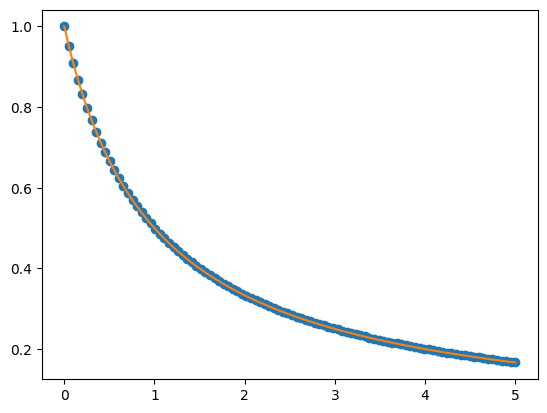

In [22]:
import matplotlib.pyplot as plt

y_analytisch = 1/(1+t_eval)
plt.plot(t_eval, sol.y[0], 'o')
plt.plot(t_eval, y_analytisch)
plt.show()

Da es schwierig ist, den Fehler der durch die blauen Punkte dargestellten numerischen Lösung im Vergleich
zur als orangefarbige Linie dargestellten analytischen Lösung mit bloßem Auge zu beurteilen, stellen wir
auch noch den relativen Fehler dar.

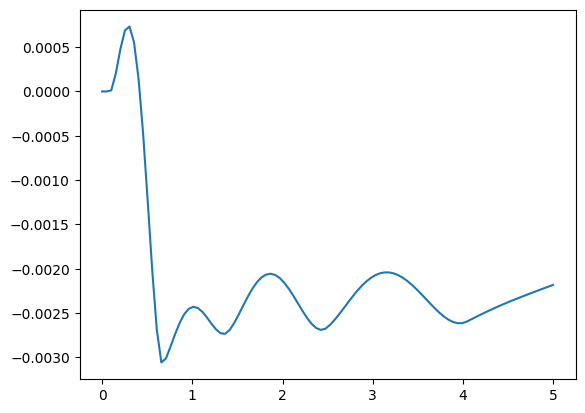

In [23]:
plt.plot(t_eval, 1-sol.y[0]/y_analytisch)
plt.show()

Aus der Abbildung lässt sich entnehmen, dass der relative Fehler hier immerhin bis zu 3‰ beträgt. 

Auf den ersten Blick könnte man meinen, dass {func}`solve_ivp` nur zur Lösung von Differentialgleichungen
erster Ordnung geeignet ist. Wie sieht es also zum Beispiel mit der Lösung der Bewegungsgleichung eines
gedämpften harmonischen Oszillators

$$\ddot x + \alpha\dot x + x = 0$$

aus? Der Trick besteht darin, diese Differentialgleichung zweiter Ordnung durch Einführung der Geschwindigkeit
als Hilfsvariable in zwei Differentialgleichungen erster Ordnung umzuschreiben, womit wir ein System 
gewöhnlicher Differentialgleichungen erster Ordnung

$$\begin{align}
\dot v &= -x-\alpha v\\
\dot x &= v
\end{align}$$

erhalten. Dieses können wir mit Hilfe von {func}`solve_ivp` lösen. Als Anfangsbedingungen wollen wir 
$x(0) = 0, v(0) = 1$ wählen, das gedämpfte Pendel also in der Ruhelage anstoßen. Natürlich hätten wir
eine kompliziertere Differentialgleichung wählen können, für die keine analytische Lösung zur Verfügung
steht. Wir wollen aber auch hier am Ende die numerische mit der analytischen Lösung vergleichen.

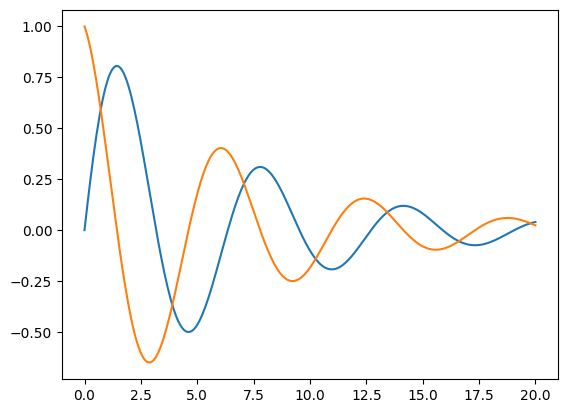

In [24]:
def ableitung(t, y, alpha):
    x, v = y
    return [v, -x-alpha*v]

t_span = (0, 20)
t_eval = np.linspace(*t_span, 300)
anfangsbedingungen = [0, 1]
alpha = 0.3
sol = solve_ivp(ableitung, t_span, anfangsbedingungen, t_eval=t_eval, args=(alpha,))
plt.plot(t_eval, sol.y[0])
plt.plot(t_eval, sol.y[1])
plt.show()

Im Gegensatz zum ersten Beispiel verlangt die Funktion, die wir hier `ableitung` genannt haben, neben
den Argumenten `t` und `y` noch den Parameter `alpha`. Dieser wird in einem Tupel an das Argument `args`
von {func}`solve_ivp` übergeben. Die Lösung in `sol.y` ist ein Vektor, so dass wir bereits im ersten
Beispiel explizit `sol.y[0]` angeben mussten, um die Lösungsfunktion zu erhalten. Hier können wir nun
sowohl den Ort (blau dargestellt) als auch die Geschwindigkeit (orange dargestellt) als Komponenten
extrahieren.

Sehen wir uns abschließend noch die Differenz zur analytischen Lösung an.

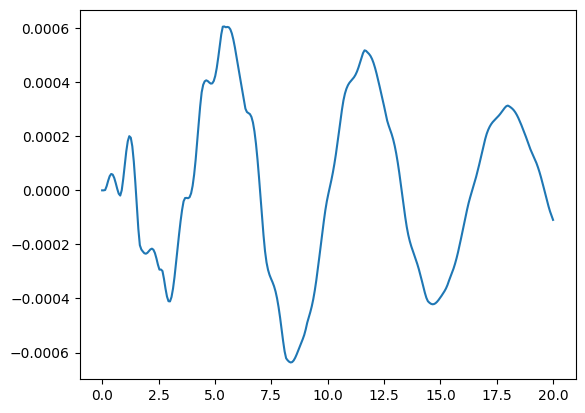

In [25]:
def y_analytisch(t, alpha):
    omega = np.sqrt(1-0.25*alpha**2)
    return np.exp(-0.5*alpha*t)*np.sin(omega*t)/omega

plt.plot(t_eval, sol.y[0]-y_analytisch(t_eval, alpha))
plt.show()

Auch in diesem Fall erhalten wir einen Fehler von einigen Promille. Benötigt man eine genauere Lösung,
so kann die Parameter `atol` für den absoluten Fehler und `rtol` für den relativen Fehler entsprechend
anpassen. Weitere Informationen hierzu finden sich in obigem Hilfetext zu {func}`solve_ivp`.

Zum Abschluss dieses Kapitels betonen wir noch einmal, dass wir hier nur einen
winzigen Eindruck von den vielfältigen Möglichkeiten geben konnten, die NumPy
und SciPy bieten. Es lohnt sich daher, einen Blick in die [Dokumentation von
NumPy](https://numpy.org/doc/stable/) und die [Dokumentation von
SciPy](https://docs.scipy.org/doc/scipy/reference/) oder zumindest die
Überschriften der [API-Dokumentation von
SciPy](https://docs.scipy.org/doc/scipy/reference/#api-reference) zu werfen.